# Part 1: Clustering

In [467]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MeanShift, DBSCAN, AgglomerativeClustering, SpectralClustering, AffinityPropagation, Birch, MiniBatchKMeans
import scipy.cluster.hierarchy as sch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score
from kneed import KneeLocator

In [468]:
df = pd.read_csv('Country-data.csv', sep=';', index_col='ID').drop('Unnamed: 11', axis=1)

In [469]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
ID,,,,,,,,,,
1,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
2,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
3,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
4,Angola,119,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
5,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0


In [470]:
df.gdpp.mean()

12901.535449101795

In [471]:
df.groupby('exports').count()

,country,child_mort,health,imports,income,inflation,life_expec,total_fer,gdpp
exports,,,,,,,,,
0.109,1,1,1,1,1,1,1,1,1
2.200,1,1,1,1,1,1,1,1,1
4.790,1,1,1,1,1,1,1,1,1
8.920,1,1,1,1,1,1,1,1,1
9.580,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
103.000,1,1,1,1,1,1,1,1,1
116.000,1,1,1,1,1,1,1,1,1
153.000,1,1,1,1,1,1,1,1,1


The values for all features must be transformed to the same scale.

In [472]:
df.dtypes

country        object
child_mort     object
exports       float64
health        float64
imports       float64
income        float64
inflation     float64
life_expec    float64
total_fer     float64
gdpp          float64
dtype: object

In [473]:
df_enc = df[['exports','health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]

In [474]:
le = LabelEncoder()

le.fit(df['country'].astype(str))
df_enc['country'] = le.transform(df['country'].astype(str))

le.fit(df['child_mort'].astype(str))
df_enc['child_mort'] = le.transform(df['child_mort'].astype(str))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [475]:
scaler = StandardScaler()
scaler.fit(df_enc)
scaled_features = scaler.transform(df_enc)

In [476]:
scaled_features

array([[-1.12569622, -0.02372967, -0.02925361, ..., -0.67433901,
        -1.71649592,  1.64226384],
       [-0.47943123, -0.15888663,  0.12059652, ..., -0.4811876 ,
        -1.69562097, -0.84683507],
       [-0.10603368, -0.47119106, -0.5760041 , ..., -0.46098233,
        -1.67474602, -0.18646189],
       ...,
       [ 1.10032763, -0.12083273,  1.40039766, ..., -0.63300013,
         1.686121  , -0.31345673],
       [-0.40762401, -0.33865851, -0.45450399, ..., -0.63300013,
         1.70699595,  0.82949685],
       [-0.15629874, -0.24549206, -0.59625412, ..., -0.62480881,
         1.7278709 ,  1.54066796]])

#### I used PCA to reduce the number of dimensions so that we can visualize the results using a 2D Scatter plot.

In [477]:
pca = PCA(2) 
df = pca.fit_transform(scaled_features)
 
df.shape

(167, 2)

### 1. KMEANS

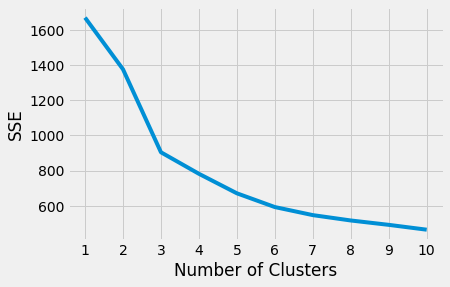

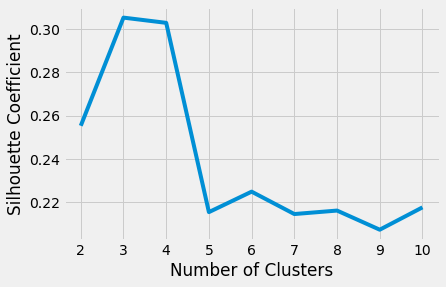

In [478]:
sse = []
silhouette_coefficients = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="random", n_init=10,max_iter=300,random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)
    
    if k > 1:
        score = silhouette_score(scaled_features, kmeans.labels_)
        silhouette_coefficients.append(score) 
    
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [479]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

3

In [480]:
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42)
kmeans.fit(df)

kmeans_silhouette = silhouette_score(scaled_features, kmeans.labels_).round(2)
kmeans_silhouette

0.29

Text(0.5, 1.0, 'K-means\nSilhouette: 0.29')

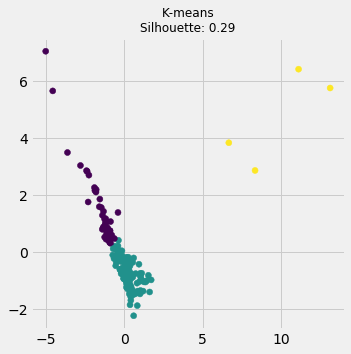

In [481]:
# The k-means plot
plt.style.use("fivethirtyeight")
fig = plt.figure(figsize = (5,5))
ax = fig.gca()
plt.scatter(df[:, 0], df[:, 1], c=kmeans.labels_)
plt.title(f"K-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12})

## 2. Mean Shift

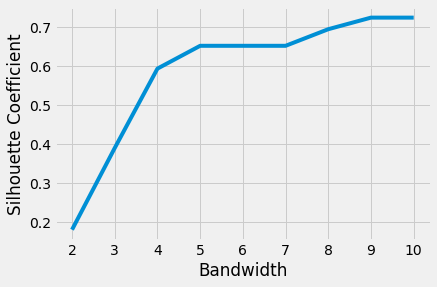

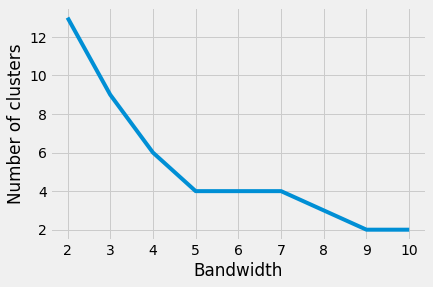

In [482]:
silhouette_coefficients = []
clusters = []
for k in range(2, 11):
    mshift = MeanShift(bandwidth=k)
    mshift.fit(scaled_features)
    score = silhouette_score(scaled_features, mshift.labels_)
    silhouette_coefficients.append(score) 
    clusters.append(len(np.unique(mshift.labels_)))

plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Bandwidth")
plt.ylabel("Silhouette Coefficient")
plt.show()

plt.plot(range(2, 11), clusters)
plt.xticks(range(2, 11))
plt.xlabel("Bandwidth")
plt.ylabel("Number of clusters")
plt.show()

In [483]:
mshift = MeanShift(bandwidth=9)
mshift.fit(scaled_features)

mshift_silhouette = silhouette_score(scaled_features, mshift.labels_).round(2)
mshift_silhouette

0.72

Text(0.5, 1.0, 'K-means\nSilhouette: 0.72')

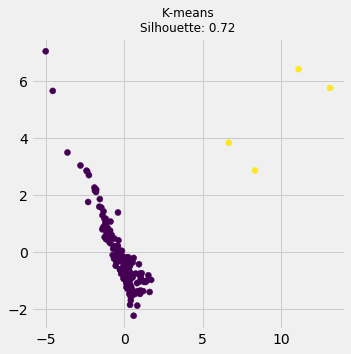

In [484]:
plt.style.use("fivethirtyeight")
fig = plt.figure(figsize = (5,5))
ax = fig.gca()
plt.scatter(df[:, 0], df[:, 1], c=mshift.labels_)
plt.title(f"K-means\nSilhouette: {mshift_silhouette}", fontdict={"fontsize": 12})

## 3. DBSCAN

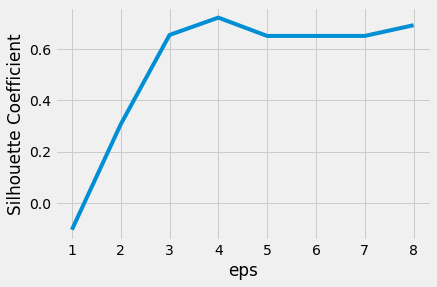

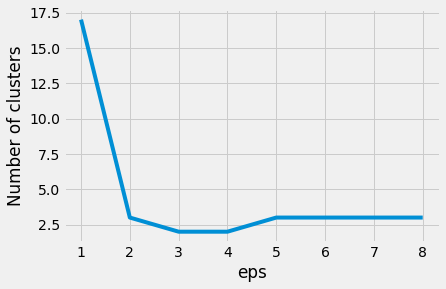

In [485]:
silhouette_coefficients = []
clusters = []
for k in range(1, 9):
    dbscan = DBSCAN(min_samples=2, eps=k)
    dbscan.fit(scaled_features)
    score = silhouette_score(scaled_features, dbscan.labels_)
    silhouette_coefficients.append(score) 
    clusters.append(len(np.unique(dbscan.labels_)))

plt.plot(range(1, 9), silhouette_coefficients)
plt.xticks(range(1, 9))
plt.xlabel("eps")
plt.ylabel("Silhouette Coefficient")
plt.show()

plt.plot(range(1, 9), clusters)
plt.xticks(range(1, 9))
plt.xlabel("eps")
plt.ylabel("Number of clusters")
plt.show()

In [486]:
dbscan = DBSCAN(min_samples=2, eps=4)
dbscan.fit(scaled_features)

dbscan_silhouette = silhouette_score(scaled_features, dbscan.labels_).round(2)
dbscan_silhouette

0.72

Text(0.5, 1.0, 'K-means\nSilhouette: 0.72')

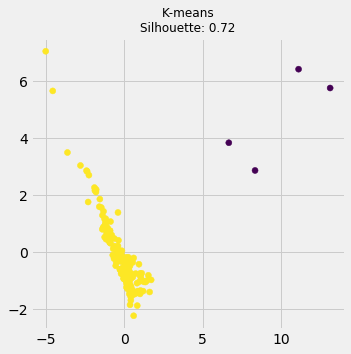

In [487]:
plt.style.use("fivethirtyeight")
fig = plt.figure(figsize = (5,5))
ax = fig.gca()
plt.scatter(df[:, 0], df[:, 1], c=dbscan.labels_)
plt.title(f"K-means\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12})

## 4. EM using GMM

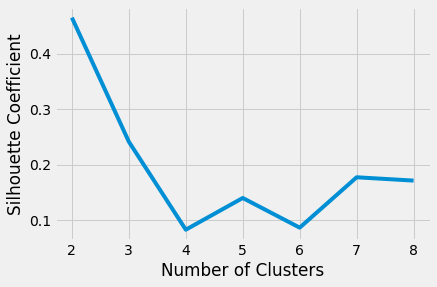

In [488]:
silhouette_coefficients = []
clusters = []
for k in range(2, 9):
    em_gmm = GaussianMixture(n_components=k)
    em_gmm_labels=em_gmm.fit_predict(scaled_features)  
    score = silhouette_score(scaled_features, em_gmm_labels)
    silhouette_coefficients.append(score) 

plt.plot(range(2, 9), silhouette_coefficients)
plt.xticks(range(2, 9))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [489]:
em_gmm = GaussianMixture(n_components=3)
em_gmm_labels=em_gmm.fit_predict(scaled_features)

em_gmm_silhouette = silhouette_score(scaled_features, em_gmm_labels).round(2)
em_gmm_silhouette

0.24

Text(0.5, 1.0, 'K-means\nSilhouette: 0.24')

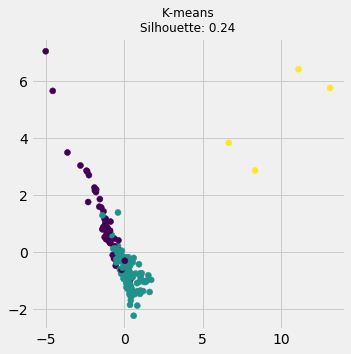

In [490]:
plt.style.use("fivethirtyeight")
fig = plt.figure(figsize = (5,5))
ax = fig.gca()
plt.scatter(df[:, 0], df[:, 1], c=em_gmm_labels)
plt.title(f"K-means\nSilhouette: {em_gmm_silhouette}", fontdict={"fontsize": 12})

## 5. Hierarchical Clustering

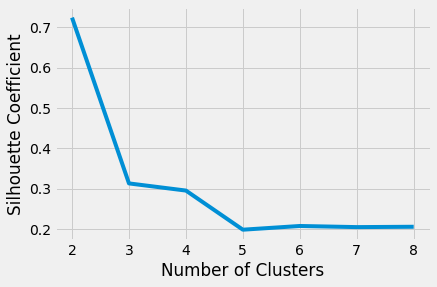

In [491]:
agglomerative = AgglomerativeClustering(n_clusters=3)
agglomerative.fit(scaled_features)

silhouette_coefficients = []
clusters = []
for k in range(2, 9):
    agglomerative = AgglomerativeClustering(n_clusters=k)
    agglomerative.fit(scaled_features) 
    score = silhouette_score(scaled_features, agglomerative.labels_)
    silhouette_coefficients.append(score) 

plt.plot(range(2, 9), silhouette_coefficients)
plt.xticks(range(2, 9))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

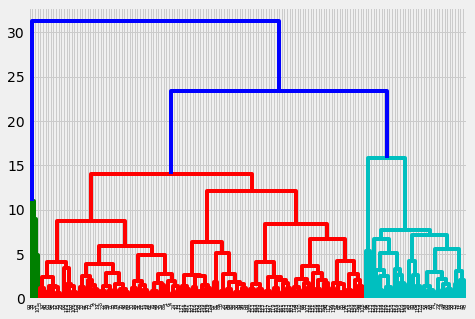

In [492]:
plt.figure(figsize=(7,5))
dend = sch.dendrogram(sch.linkage(scaled_features, method='ward'))
plt.show()

In [493]:
agglomerative = AgglomerativeClustering(n_clusters=3)
agglomerative.fit(scaled_features)

AgglomerativeClustering(n_clusters=3)

Text(0.5, 1.0, 'K-means\nSilhouette: 0.29')

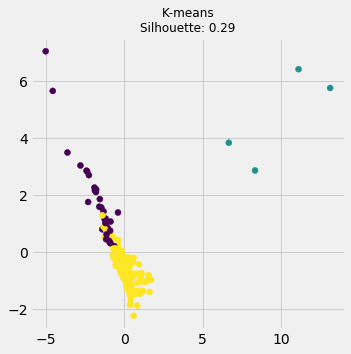

In [494]:
plt.style.use("fivethirtyeight")
fig = plt.figure(figsize = (5,5))
ax = fig.gca()
plt.scatter(df[:, 0], df[:, 1], c=agglomerative.labels_)
plt.title(f"K-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12})

## Compare clustering methods using the silhouette

In [495]:
# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(scaled_features, kmeans.labels_).round(2)
mshift_silhouette = silhouette_score(scaled_features, mshift.labels_).round(2)
dbscan_silhouette = silhouette_score(scaled_features, dbscan.labels_).round(2)
em_gmm_silhouette = silhouette_score(scaled_features, em_gmm_labels).round(2)
agglomerative_silhouette = silhouette_score(scaled_features, agglomerative.labels_).round(2)

In [496]:
kmeans_silhouette

0.29

In [497]:
mshift_silhouette

0.72

In [498]:
dbscan_silhouette

0.72

In [499]:
em_gmm_silhouette

0.24

In [500]:
agglomerative_silhouette

0.31

## The Overal Results

Text(0.5, 1.0, 'Agglomerative clustering\nSilhouette: 0.31')

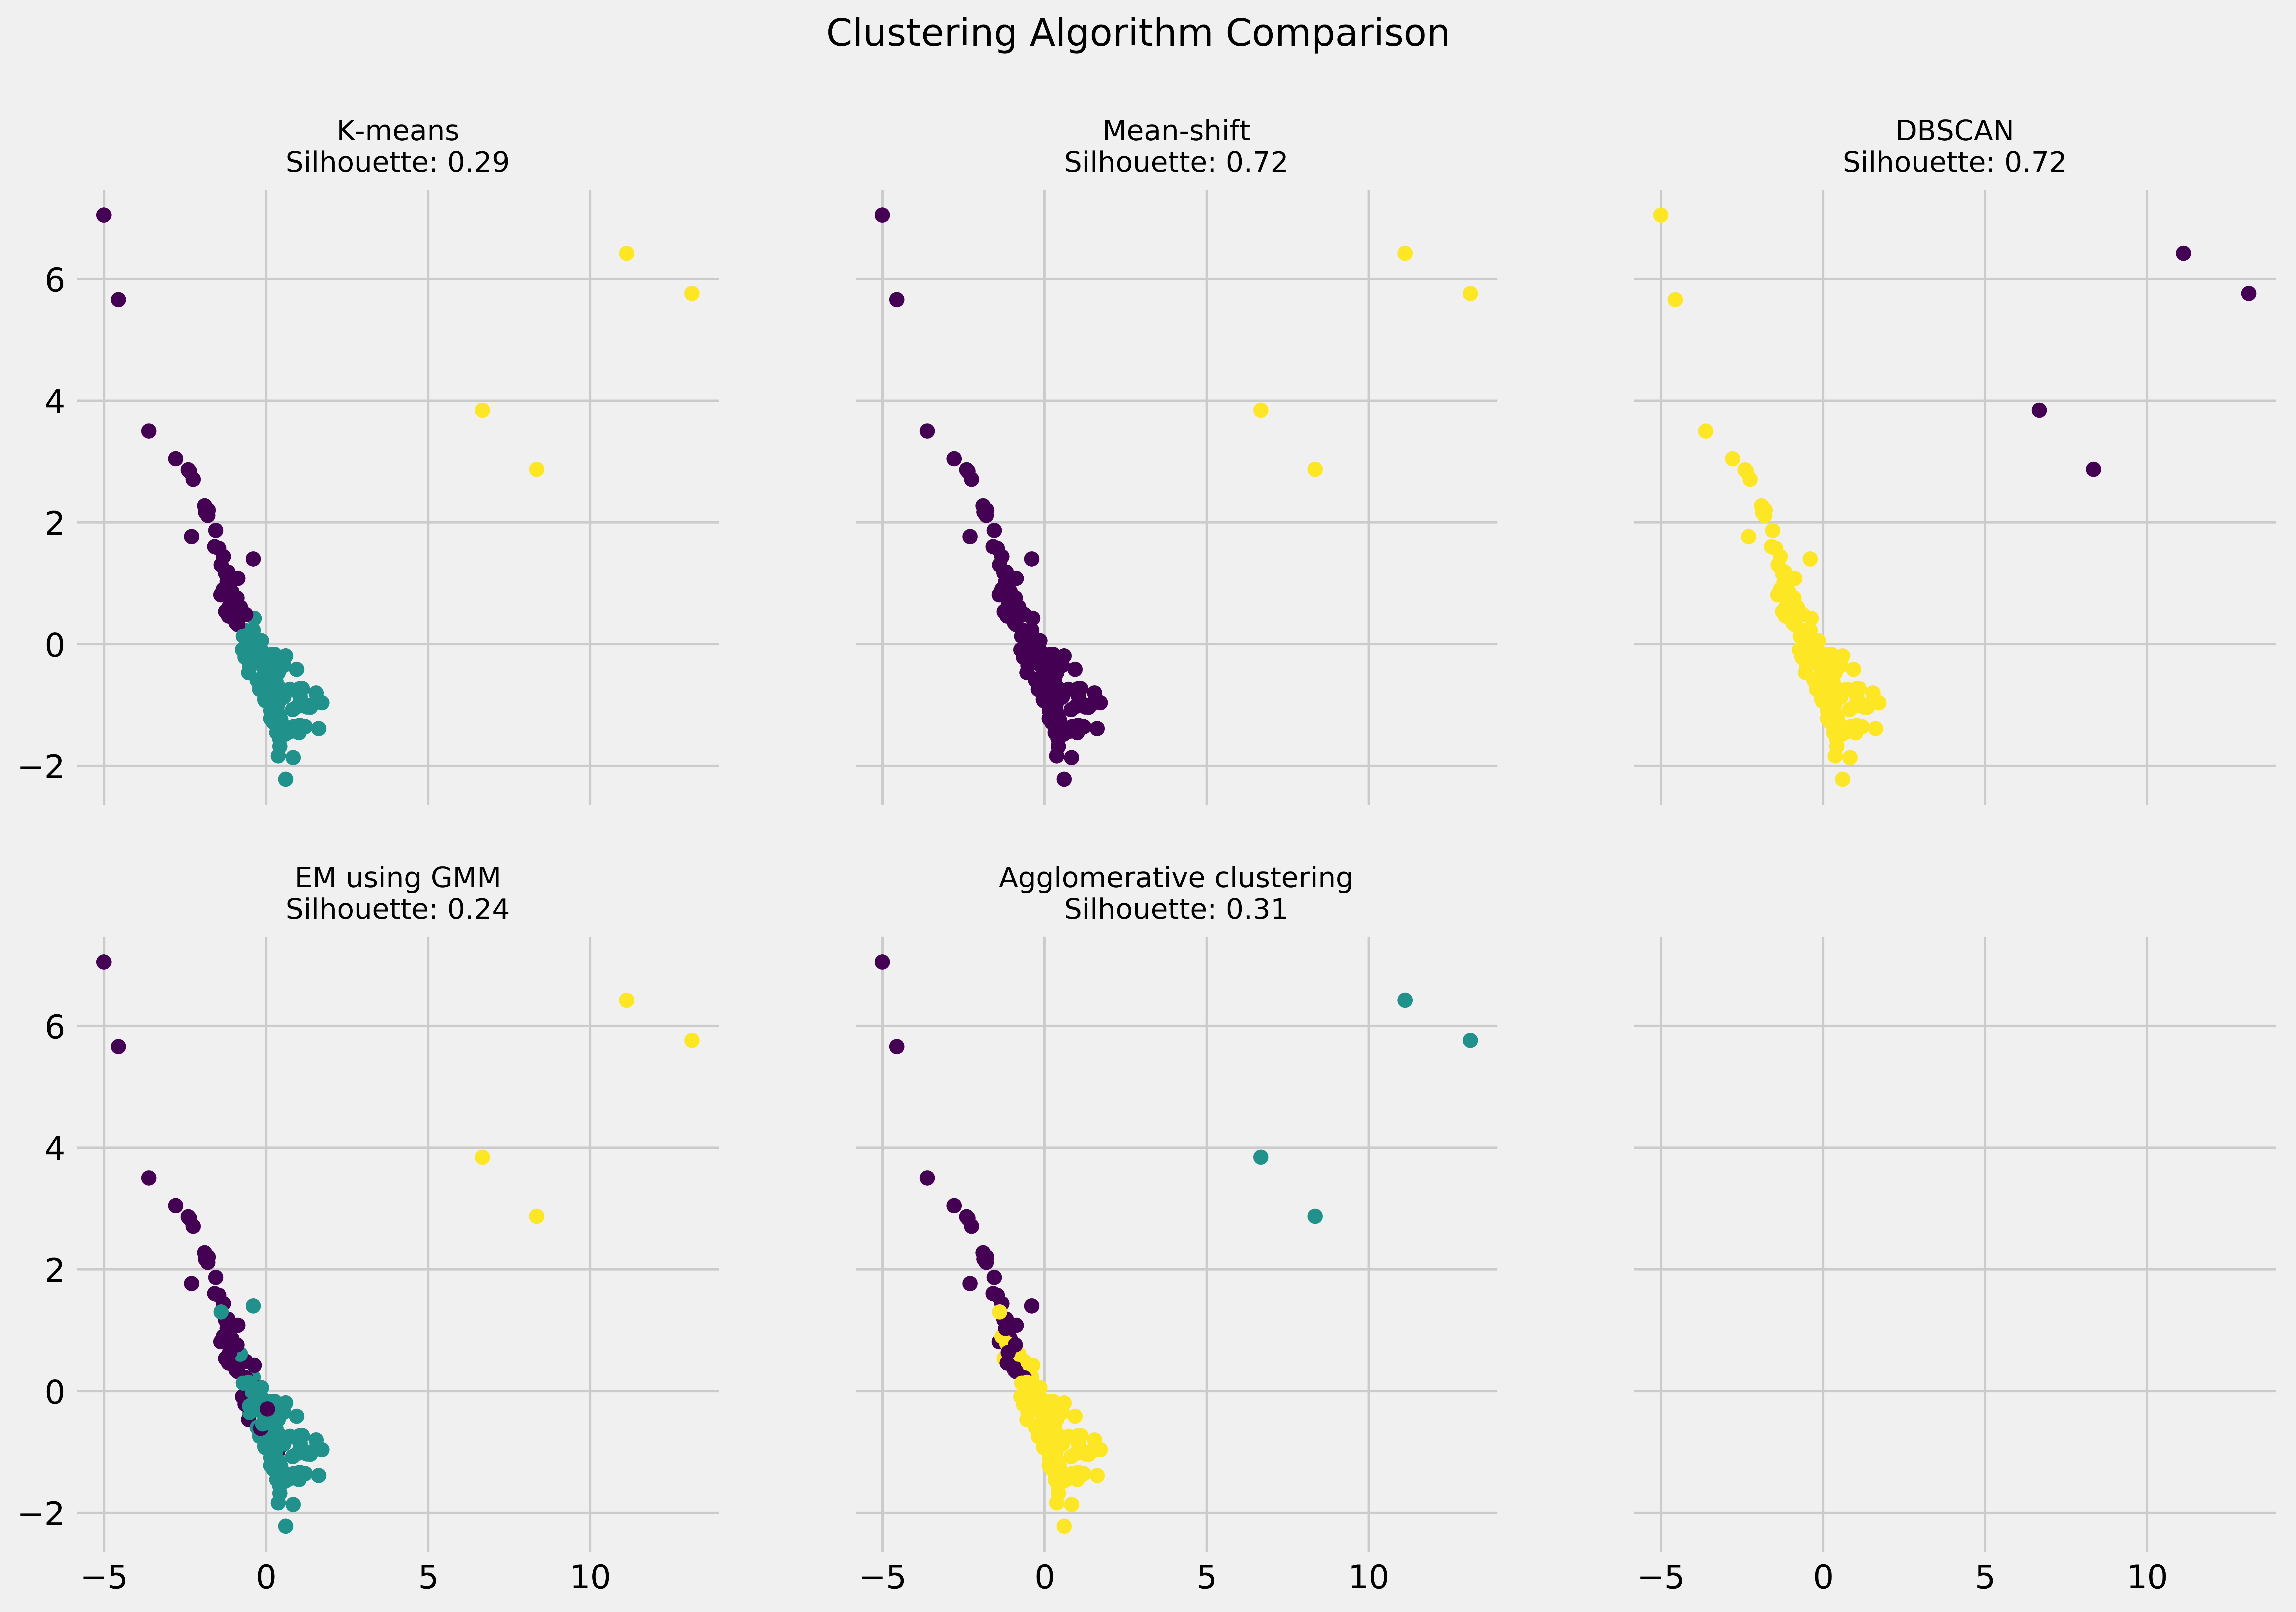

In [501]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True, dpi=600)
fig.suptitle(f"Clustering Algorithm Comparison", fontsize=16)
#fte_colors = {0: "#008fd5", 1: "#fc4f30", 2: "#1f77b4", 3: "#ff7f0e",4: "#2ca02c",5: "#d62728", -1: "#9467bd"}


# The k-means plot
ax[0,0].scatter(df[:, 0], df[:, 1], c=kmeans.labels_)
ax[0,0].set_title(f"K-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12})

# The mean-shift plot
ax[0,1].scatter(df[:, 0], df[:, 1], c=mshift.labels_)
ax[0,1].set_title(f"Mean-shift\nSilhouette: {mshift_silhouette}", fontdict={"fontsize": 12})

# The dbscan plot
ax[0,2].scatter(df[:, 0], df[:, 1], c=dbscan.labels_)
ax[0,2].set_title(f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12})

# The EM using GMM
ax[1,0].scatter(df[:, 0], df[:, 1], c=em_gmm_labels)
ax[1,0].set_title(f"EM using GMM\nSilhouette: {em_gmm_silhouette}", fontdict={"fontsize": 12})

# The agglomerative plot
ax[1,1].scatter(df[:, 0], df[:, 1], c=agglomerative.labels_)
ax[1,1].set_title(f"Agglomerative clustering\nSilhouette: {agglomerative_silhouette}", fontdict={"fontsize": 12})


# plt.show()

# Part 3. GARCH models

In [502]:
from scipy.stats import norm
import random
import math

## Simulating time series

In [552]:
n = 2000
random.seed(55)
e = norm.rvs(size=n)
eps = e.copy()
r = e.copy()
sig2 = e.copy()**2 
sig = e.copy()
omega = 1
alpha = 1.2
beta = 1.9
phi = 0.9
mu = 0.5

In [553]:
for t in range(1,(n-1)):
    eps[t] = math.sqrt(sig2[t])*e[t] 
    r[t] = mu + eps[t] + phi*(r[t-1]-mu)
    sig2[t+1] = omega + alpha * eps[t]**2 + beta * sig[t]**2

Text(0.5, 1.0, '(b) ARCH part')

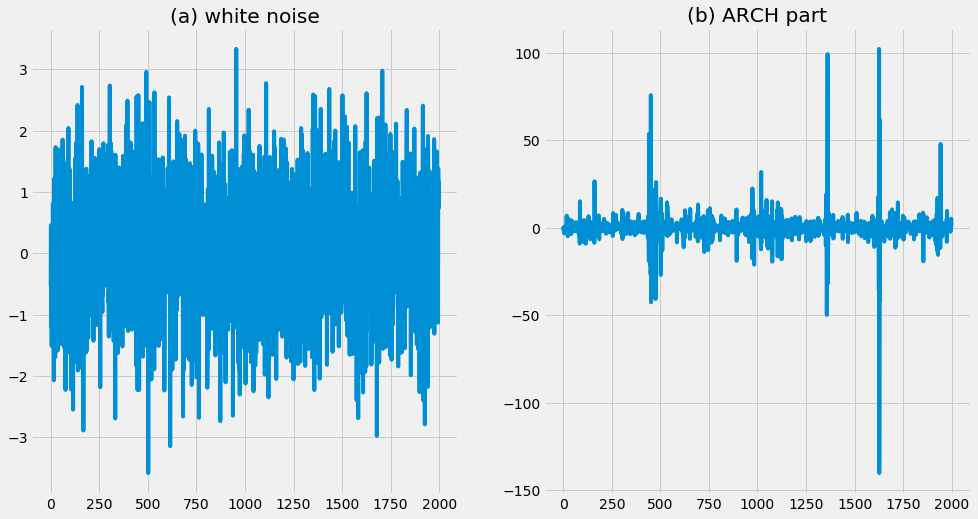

In [554]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
ax1.plot(e)
ax1.set_title("(a) white noise")
ax2.plot(eps)
ax2.set_title("(b) ARCH part")

Text(0.5, 1.0, '(b) conditional variance')

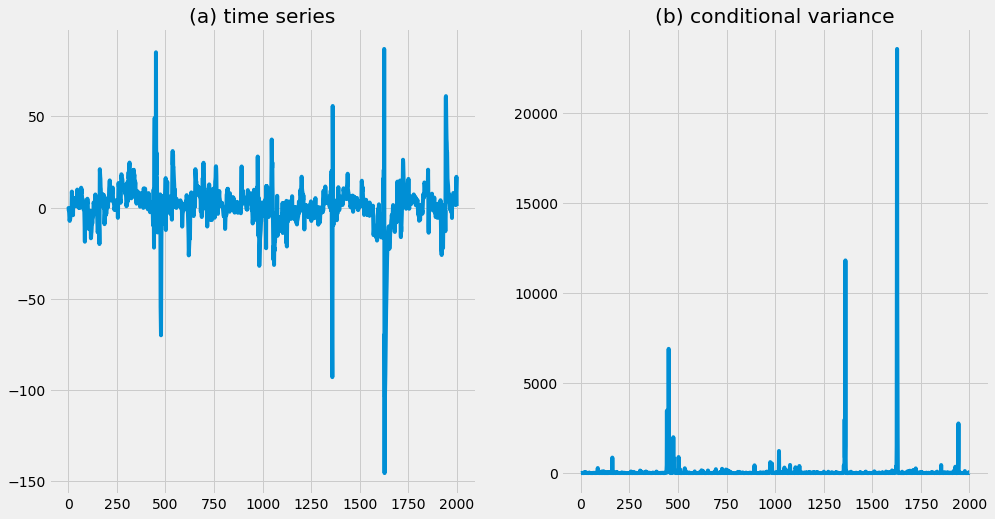

In [555]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
ax1.plot(r)
ax1.set_title("(a) time series")
ax2.plot(sig2)
ax2.set_title("(b) conditional variance")

In [556]:
from arch import arch_model

## GARCH

In [557]:
garch_model = arch_model(r, p = 1, q = 1, mean = 'constant', vol = 'GARCH', dist = 'normal')

In [558]:
garch_result = garch_model.fit()
print(garch_result.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6667.764550013391
Iteration:      2,   Func. Count:     14,   Neg. LLF: 6605.960526204297
Iteration:      3,   Func. Count:     21,   Neg. LLF: 6505.343839693703
Iteration:      4,   Func. Count:     29,   Neg. LLF: 6493.791757923742
Iteration:      5,   Func. Count:     36,   Neg. LLF: 6405.17762802415
Iteration:      6,   Func. Count:     43,   Neg. LLF: 6381.061446335324
Iteration:      7,   Func. Count:     50,   Neg. LLF: 6359.560153740989
Iteration:      8,   Func. Count:     56,   Neg. LLF: 6325.724047414212
Iteration:      9,   Func. Count:     63,   Neg. LLF: 6324.8453514010525
Iteration:     10,   Func. Count:     69,   Neg. LLF: 6320.92126743378
Iteration:     11,   Func. Count:     75,   Neg. LLF: 6320.465410011604
Iteration:     12,   Func. Count:     81,   Neg. LLF: 6320.462880940258
Iteration:     13,   Func. Count:     87,   Neg. LLF: 6320.4628511240335
Optimization terminated successfully.    (Exit mode 0)
         

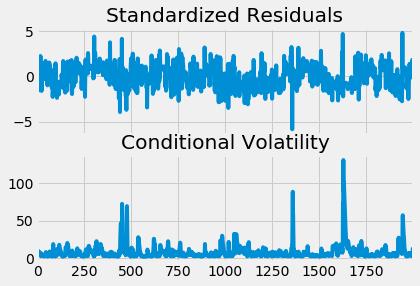

In [559]:
garch_result.plot()
plt.show()

**Visual check: compare the initial return data and the standardized residuals**

Text(0.5, 1.0, '(b) standardized residuals')

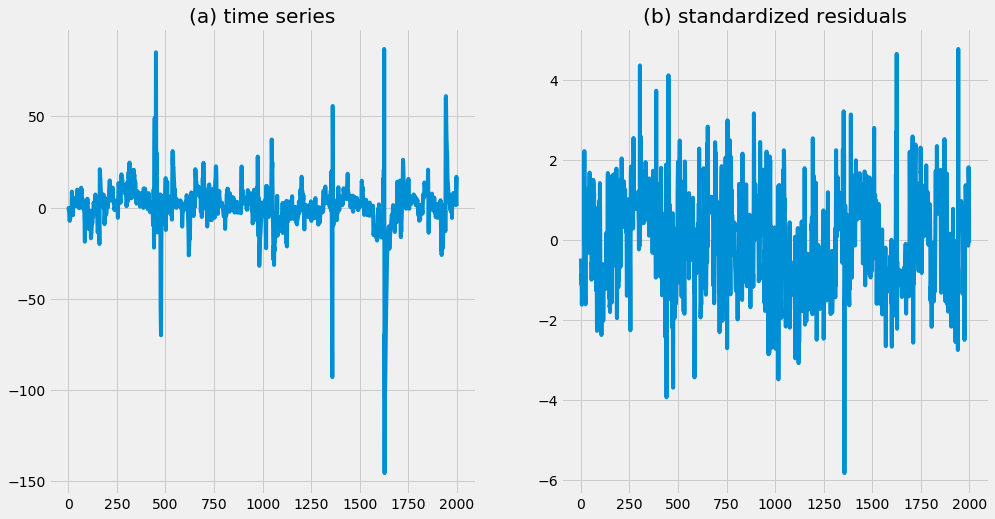

In [560]:
standardized_residuals = garch_result.resid/garch_result.conditional_volatility

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
ax1.plot(r)
ax1.set_title("(a) time series")
ax2.plot(standardized_residuals)
ax2.set_title("(b) standardized residuals")

## EGARCH

In [561]:
egarch_model = arch_model(r, p = 1, q = 1, mean = 'constant', vol = 'EGARCH', dist = 'normal')

In [562]:
egarch_result = egarch_model.fit()
print(egarch_result.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6895.910175097677
Iteration:      2,   Func. Count:     15,   Neg. LLF: 6474.312314077206
Iteration:      3,   Func. Count:     25,   Neg. LLF: 6402.61150483356
Iteration:      4,   Func. Count:     33,   Neg. LLF: 6387.874683095304
Iteration:      5,   Func. Count:     41,   Neg. LLF: 6302.983286030577
Iteration:      6,   Func. Count:     49,   Neg. LLF: 6302.634844776423
Iteration:      7,   Func. Count:     55,   Neg. LLF: 6296.612481397196
Iteration:      8,   Func. Count:     61,   Neg. LLF: 6294.581387528164
Iteration:      9,   Func. Count:     67,   Neg. LLF: 6293.8604386438055
Iteration:     10,   Func. Count:     73,   Neg. LLF: 6293.740836692619
Iteration:     11,   Func. Count:     79,   Neg. LLF: 6293.708725018279
Iteration:     12,   Func. Count:     85,   Neg. LLF: 6293.702307800513
Iteration:     13,   Func. Count:     91,   Neg. LLF: 6293.702204960741
Iteration:     14,   Func. Count:     97,   Neg. LLF: 6293.70220

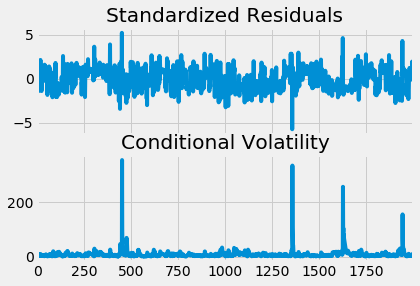

In [563]:
egarch_result.plot()
plt.show()

Text(0.5, 1.0, '(b) standardized residuals')

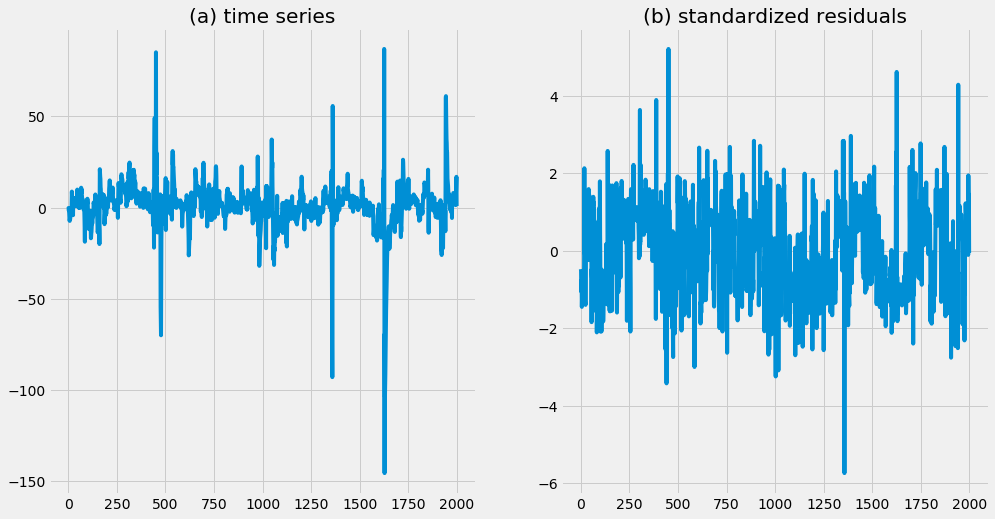

In [564]:
standardized_residuals = egarch_result.resid/egarch_result.conditional_volatility

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
ax1.plot(r)
ax1.set_title("(a) time series")
ax2.plot(standardized_residuals)
ax2.set_title("(b) standardized residuals")

# ARMA

In [565]:
from statsmodels.tsa.arima_model import ARMA, ARMAResults

In [566]:
model = ARMA(r, order=(1,2))
arma_results = model.fit()
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 2000
Model:                     ARMA(1, 2)   Log Likelihood               -4006.679
Method:                       css-mle   S.D. of innovations              1.793
Date:                Fri, 18 Dec 2020   AIC                           8023.358
Time:                        16:42:59   BIC                           8051.363
Sample:                             0   HQIC                          8033.641
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4332      0.388      3.693      0.000       0.673       2.194
ar.L1.y        0.8998      0.012     74.630      0.000       0.876       0.923
ma.L1.y       -0.0045      0.025     -0.176      0.8

Text(0.5, 1.0, '(b) standardized residuals')

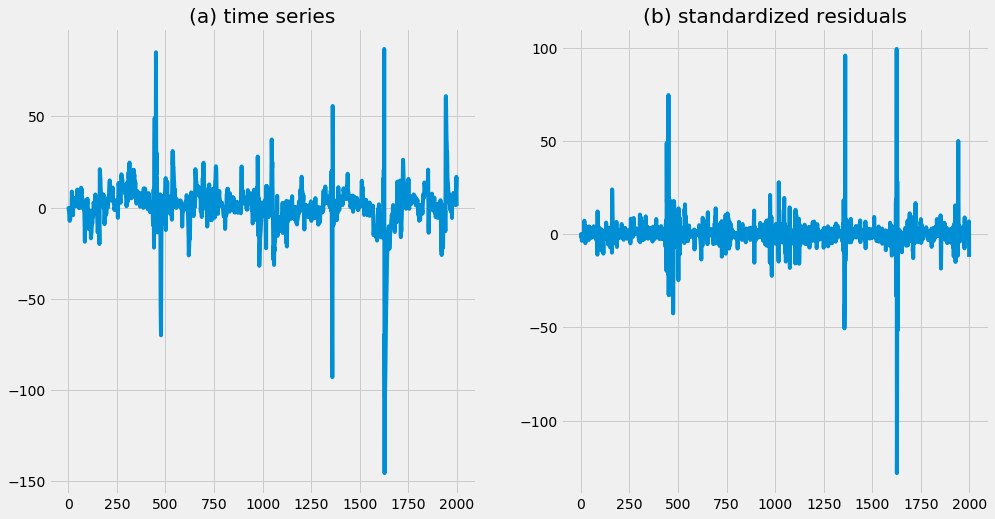

In [567]:
standardized_residuals = arma_results.resid

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
ax1.plot(r)
ax1.set_title("(a) time series")
ax2.plot(standardized_residuals)
ax2.set_title("(b) standardized residuals")

# Coclusion:

**EGARCH addresses volatility clustering and asymmetric shocks, their standardized residuals look like white noise and do not have clear clustering. Howewer based on AIC and BIC value ARMA model is much less complex. In this case we suspect volatility changes over time and that's why better choose *ARCH models, EGARCH is preffered**